In [1]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
# arima.sim로 ARIMA모형 가상 데이터 생성
set.seed(12)
ma_1<-arima.sim(list(order=c(0,0,1), ma=0.6), n=300)

# train, test 데이터 나누기
train<-window(ma_1, start=1, 250)
test<-window(ma_1, start=251, end=300)

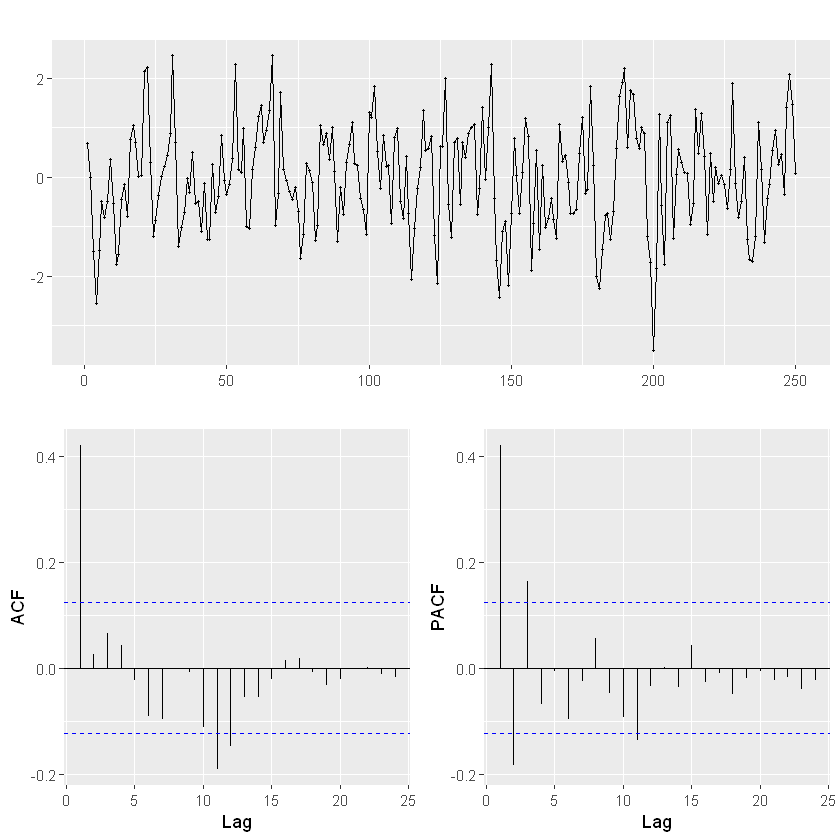

In [4]:
# 1.모형식별 - ACF, PACF 함수사용
ggtsdisplay(train)

In [5]:
# 1.모형식별 - KPSS검정
library(urca)
summary(ur.kpss(train))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.0448 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [6]:
# 2.모수추정
Arima(train, order=c(0,0,1))

Series: train 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1     mean
      0.5465  -0.0151
s.e.  0.0531   0.0907

sigma^2 estimated as 0.8695:  log likelihood=-336.42
AIC=678.84   AICc=678.94   BIC=689.41

In [7]:
# 2. order인자 따로 설정해주지 않고 자동으로 해주는 autoarima사용해보기
auto.arima(train)

Series: train 
ARIMA(0,0,1) with zero mean 

Coefficients:
         ma1
      0.5465
s.e.  0.0531

sigma^2 estimated as 0.8661:  log likelihood=-336.44
AIC=676.87   AICc=676.92   BIC=683.91


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 5.0361, df = 8, p-value = 0.7537

Model df: 2.   Total lags used: 10



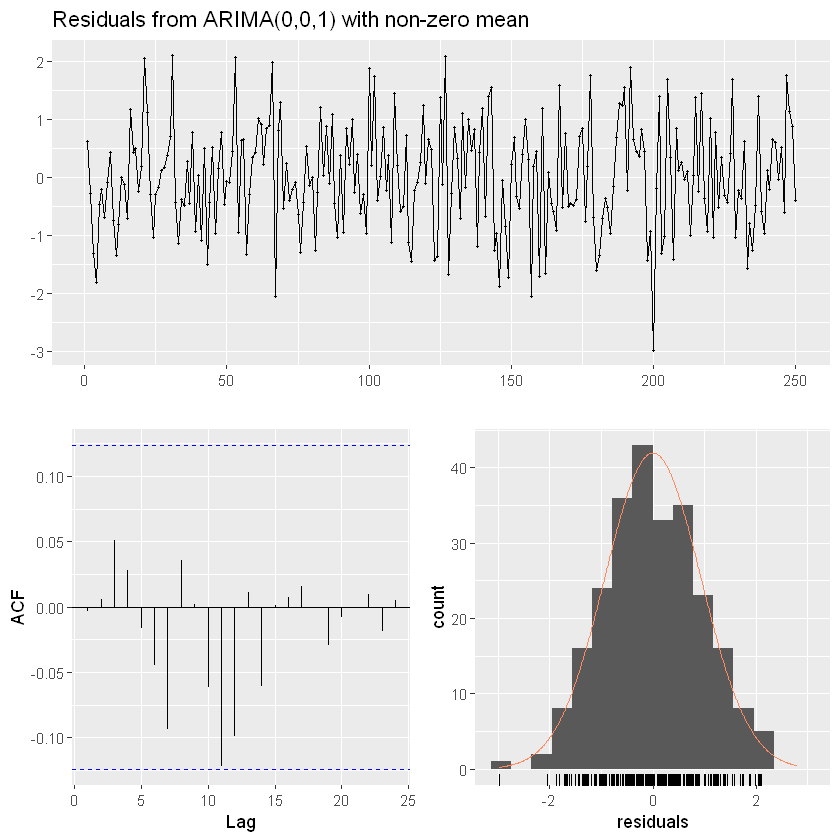

In [8]:
# 3.적합성 진단 by 잔차의 그래프- checkresidual함수 사용
ma_1_fit<-Arima(train, order=c(0,0,1))
checkresiduals(ma_1_fit)

In [9]:
# 3.적합성진단 - Ljung-box 사용
Box.test(ma_1_fit$residuals, lag=10, type='Ljung-Box')


	Box-Ljung test

data:  ma_1_fit$residuals
X-squared = 5.0361, df = 10, p-value = 0.8888


In [10]:
# 4.예측 - Forecast함수 사용
for_ma_1<-forecast(ma_1_fit, h=50)
# test 데이터와 비교 - accuracy 사용
accuracy(for_ma_1, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0008659712,0.928706,0.7543535,85.48332,164.35061,0.8350155,-0.003145737,NA
Test set,-0.0686274440,1.112753,0.8528444,95.63691,97.10179,0.9440379,0.189168340,1.002757


In [17]:
# 4.예측 - meanf와 naive방법과 비교해보기
meanf<-meanf(train, h=50)
naive<-naive(train, h=50)
# test와 비교
accuracy(meanf, test)
accuracy(naive, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.110399e-17,1.057064,0.8558607,100.64924,101.03023,0.9473767,0.4213106,NA
Test set,-7.253557e-02,1.113647,0.8571675,96.74196,98.43172,0.9488233,0.1887699,1.003128


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.002478136,1.138600,0.9034006,57.66498,285.2070,1.0000000,-0.1584735,NA
Test set,-0.159724817,1.122703,0.8505228,115.16848,116.1018,0.9414681,0.1887699,0.913181


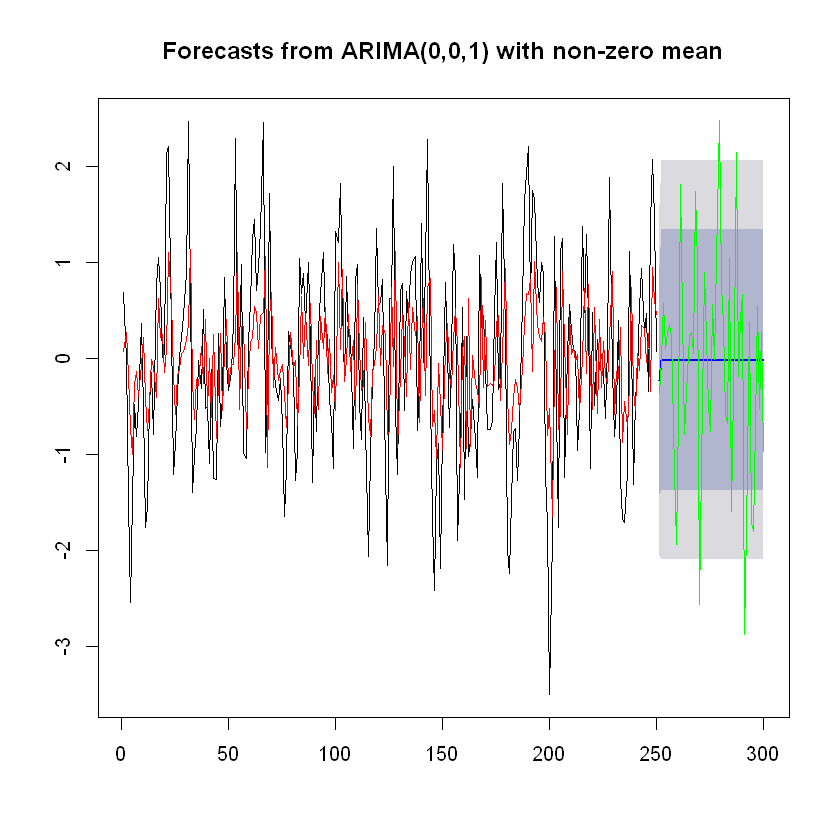

In [21]:
# 5. 그래프 그려보기 - MA(1)모형
plot(for_ma_1)
lines(for_ma_1$fitted, col='red')
lines(test, col='green')

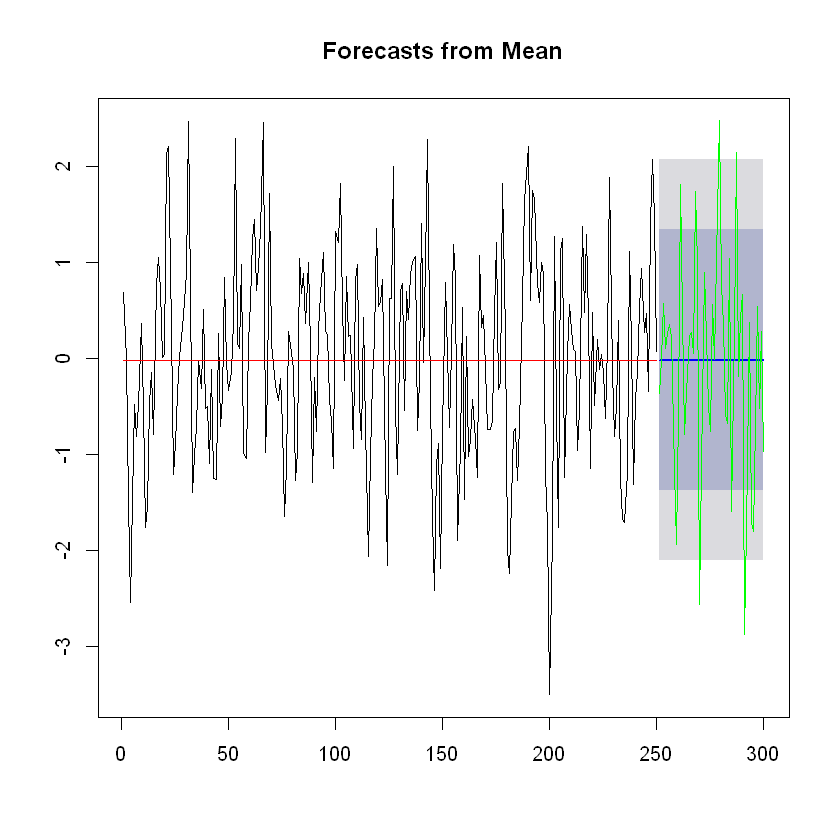

In [23]:
# 5. 그래프 그려보기 - meanf모형
plot(meanf)
lines(meanf$fitted, col='red')
lines(test, col='green')`


	Ljung-Box test

data:  Residuals from Mean
Q* = 54.755, df = 9, p-value = 1.356e-08

Model df: 1.   Total lags used: 10



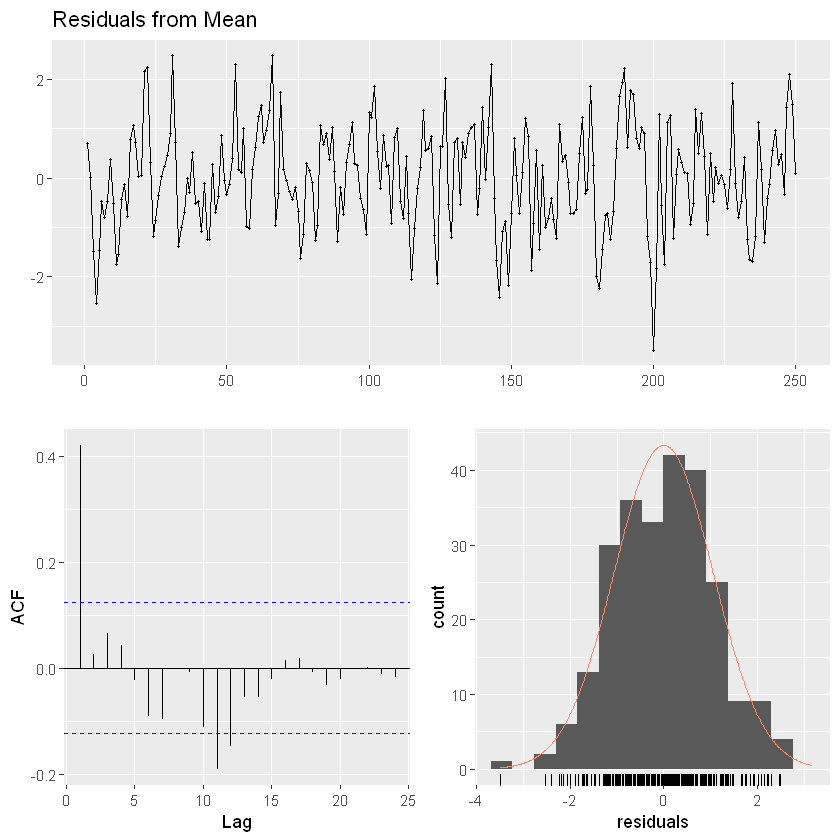

In [25]:
checkresiduals(meanf)

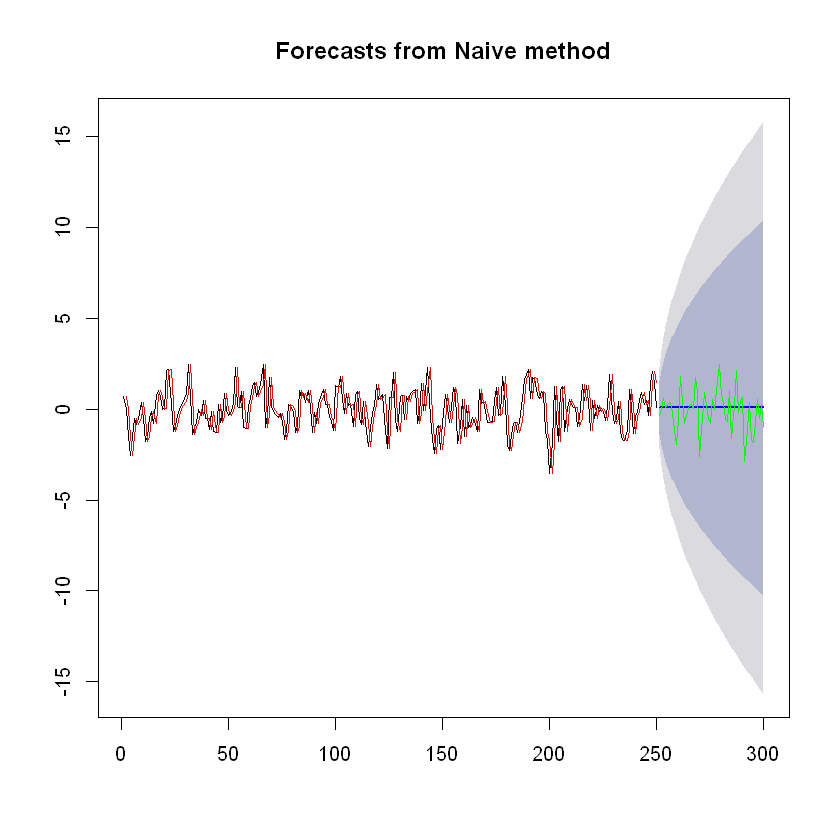


	Ljung-Box test

data:  Residuals from Naive method
Q* = 49.258, df = 10, p-value = 3.654e-07

Model df: 0.   Total lags used: 10



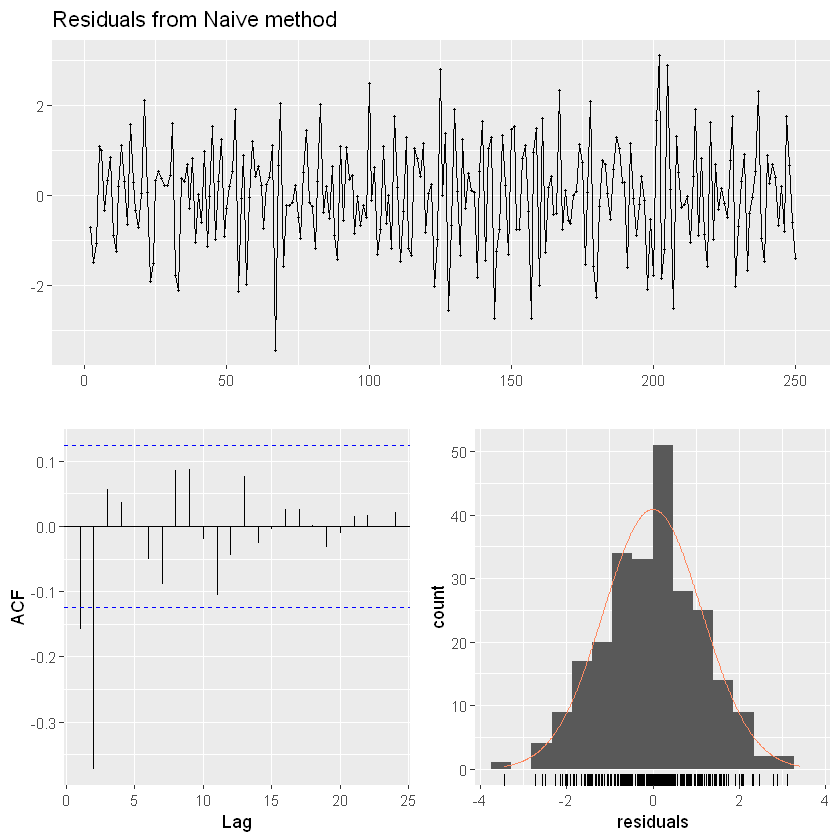

In [26]:
# 5. 그래프 그려보기 - naive모형
plot(naive)
lines(naive$fitted, col='red')
lines(test, col='green')
checkresiduals(naive)